In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


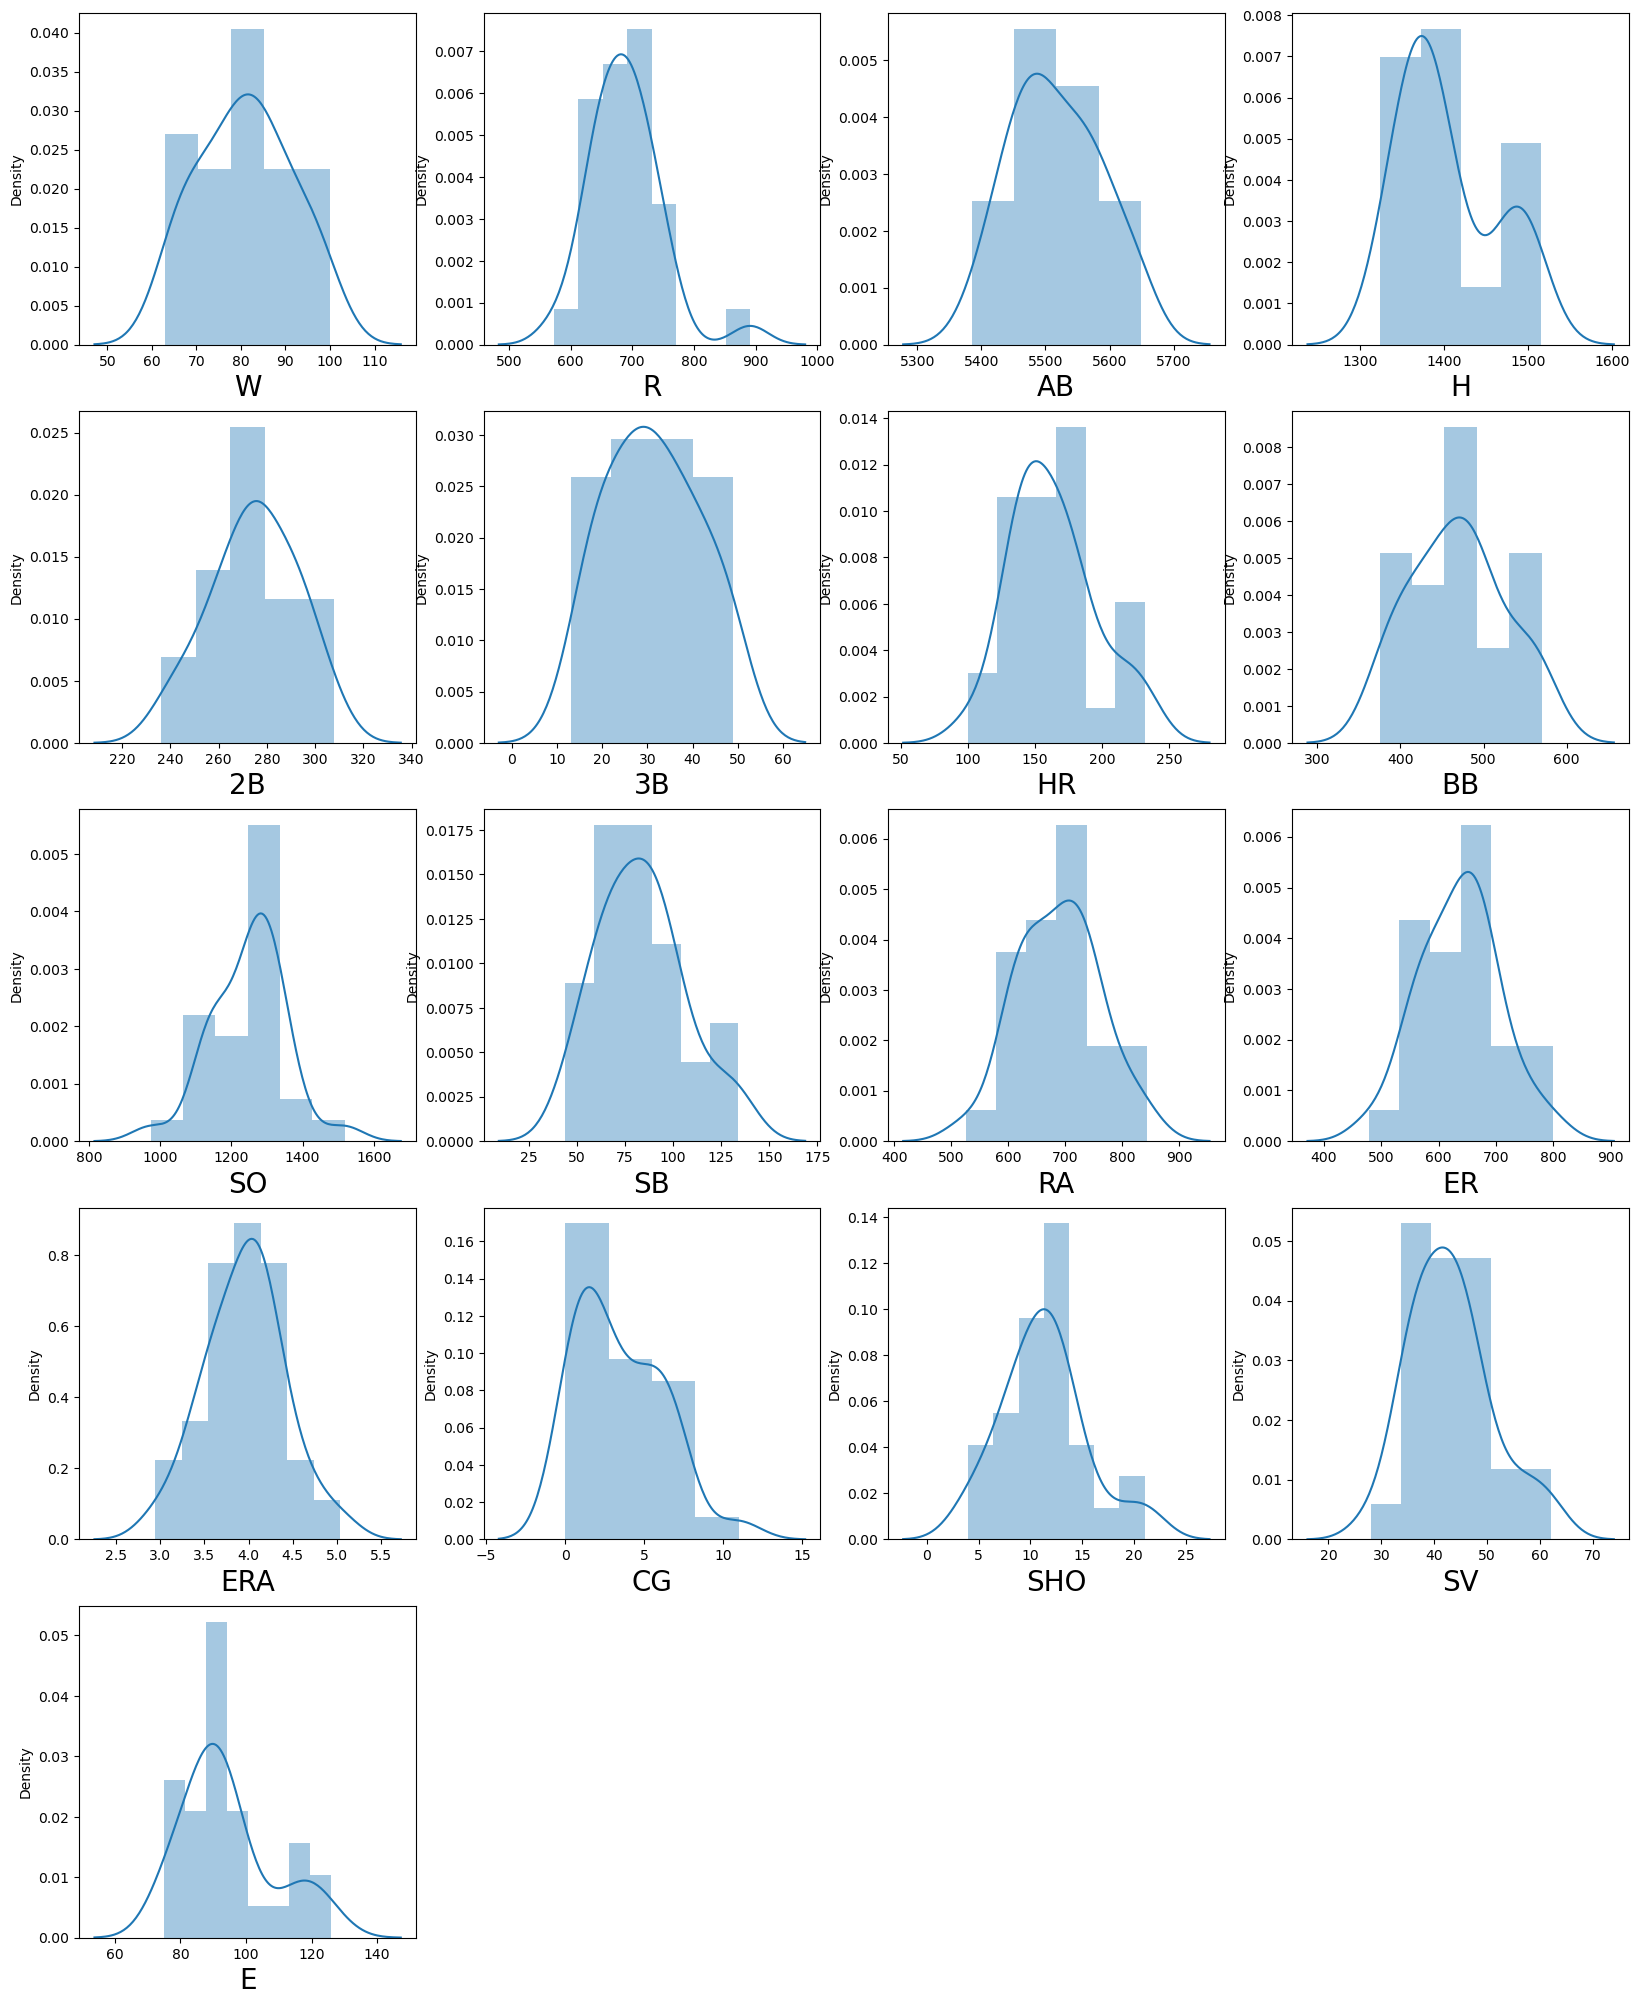

In [7]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=20:
        ax=plt.subplot(5,4,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.show()

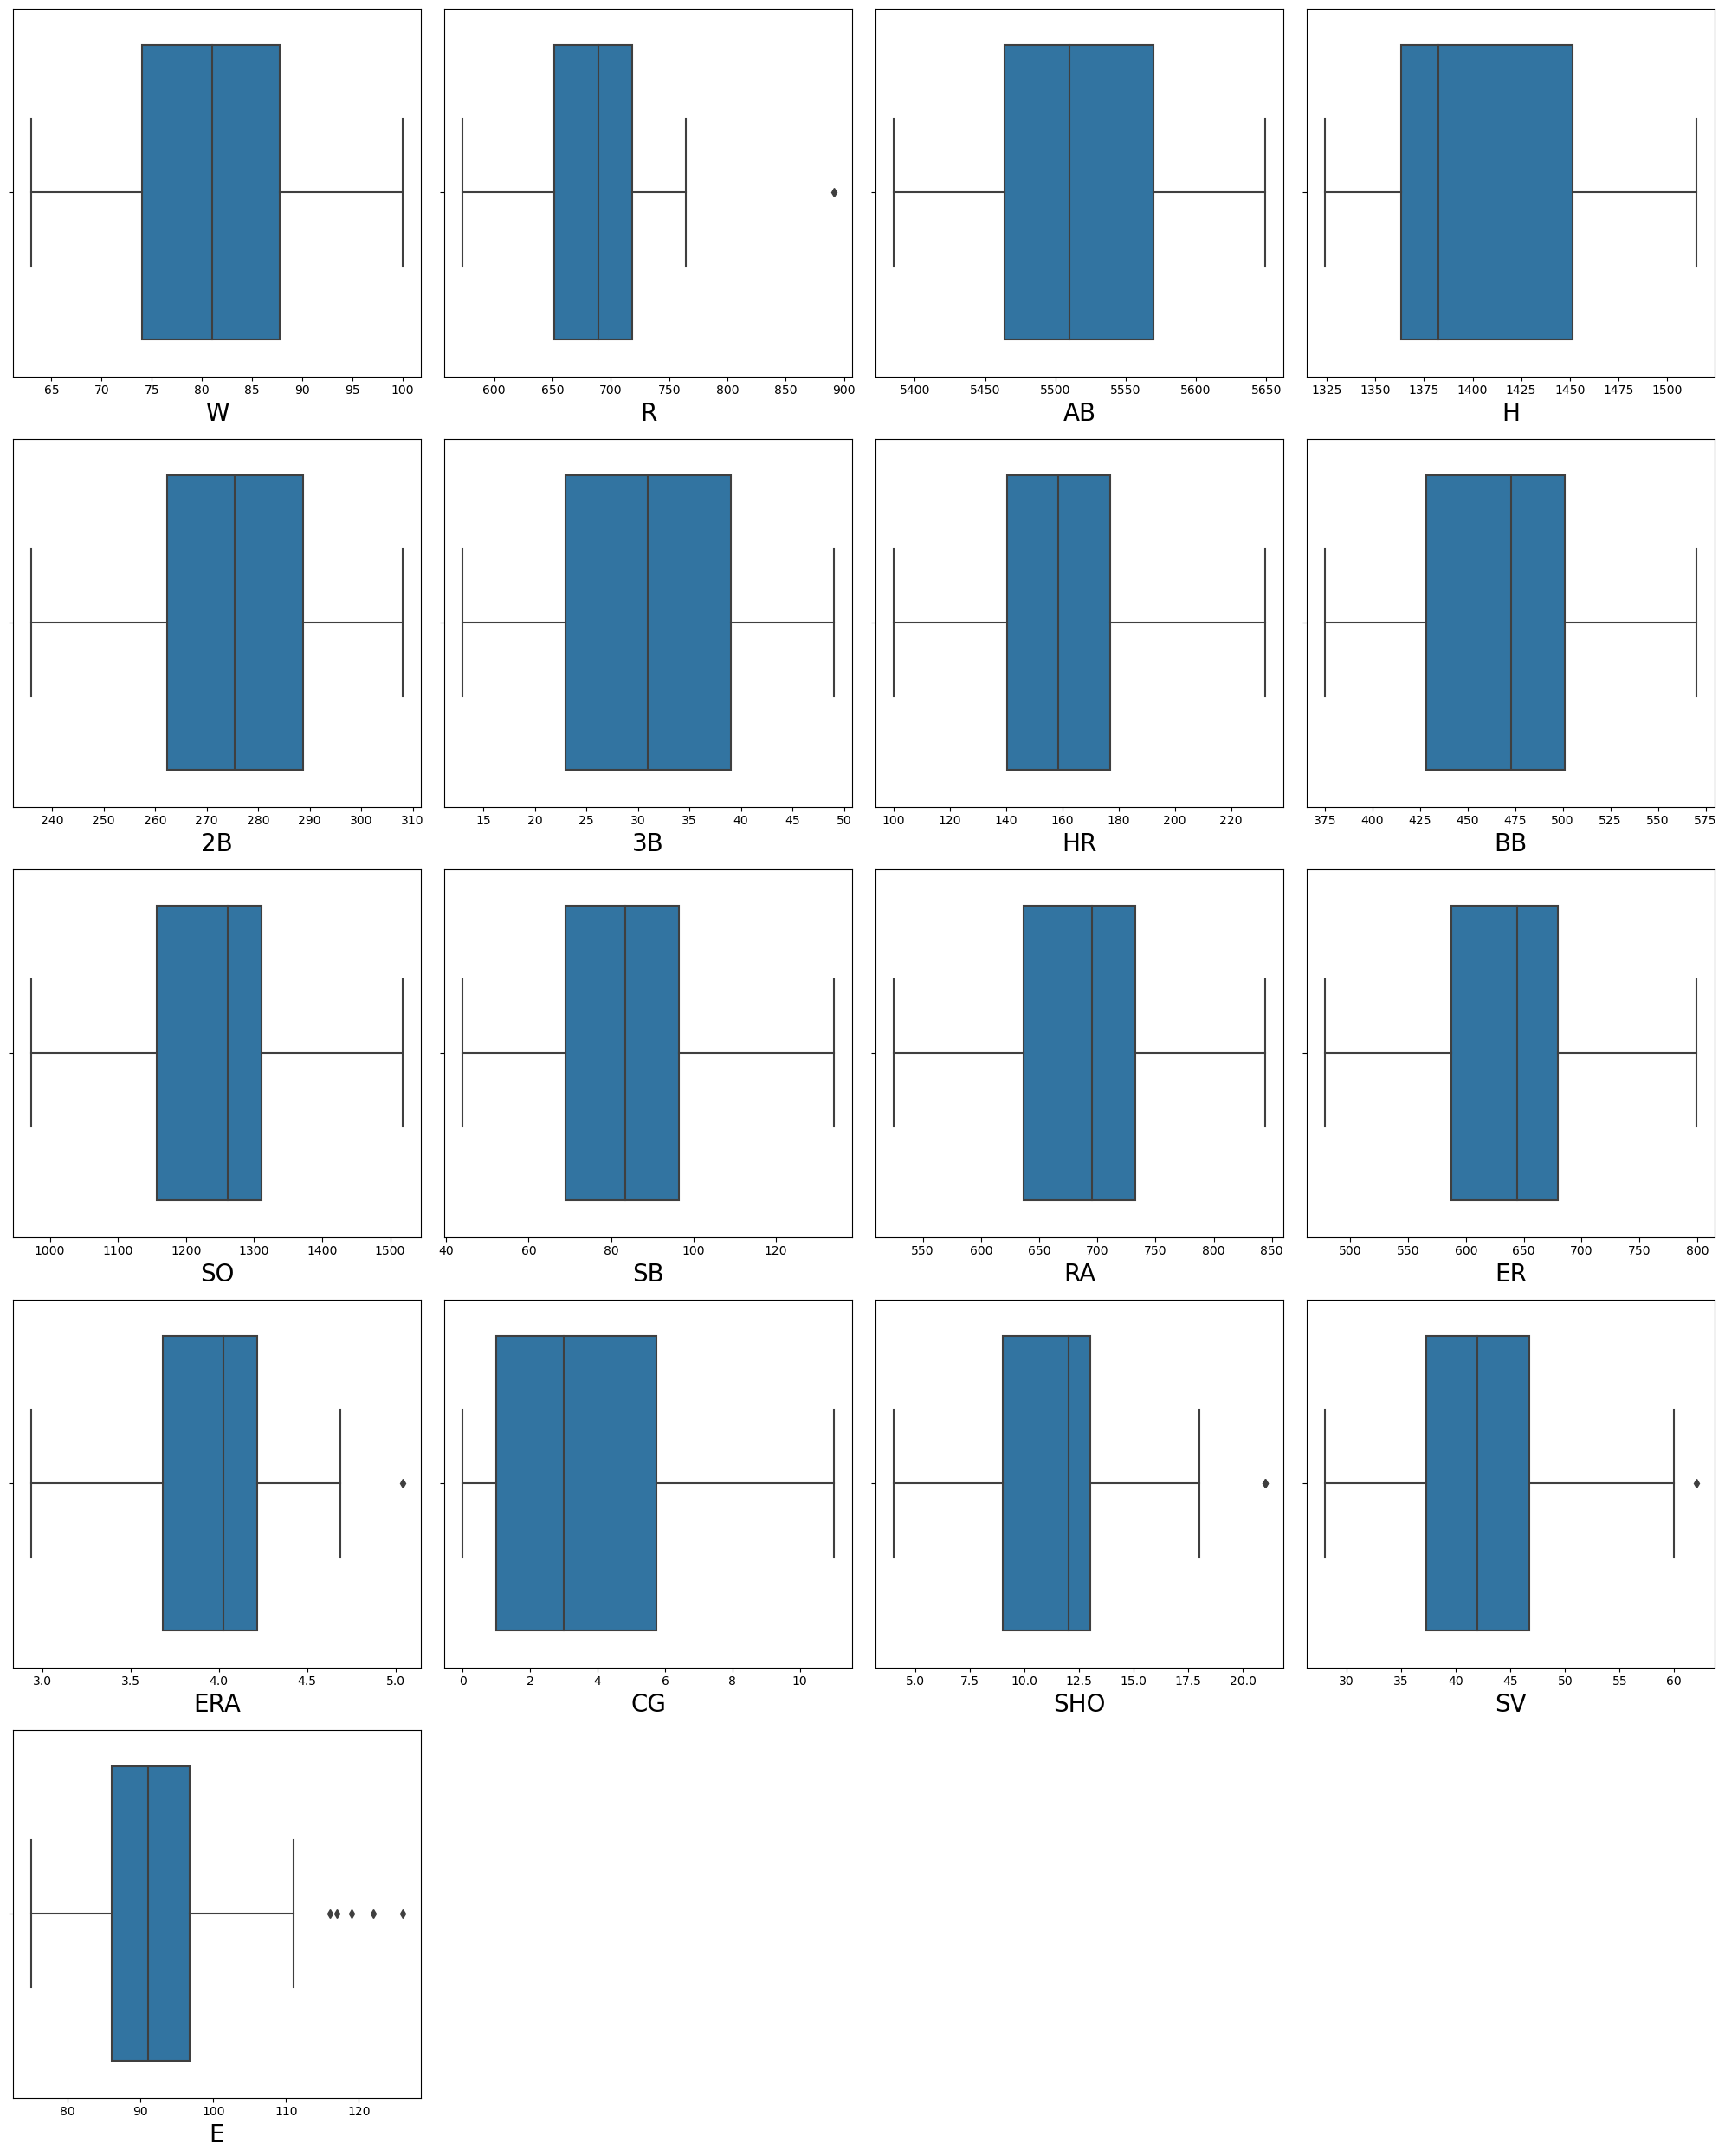

In [8]:
plt.figure(figsize=(20,25))
graph=1
for i in data.columns:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

In [9]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
iqr

W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64

In [10]:
e_h=q3.E+(1.5*iqr.E)
ind_num=np.where(e_h<data['E'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(25, 17)

In [47]:
x=data.drop(columns='W')
y=data['W']

In [49]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


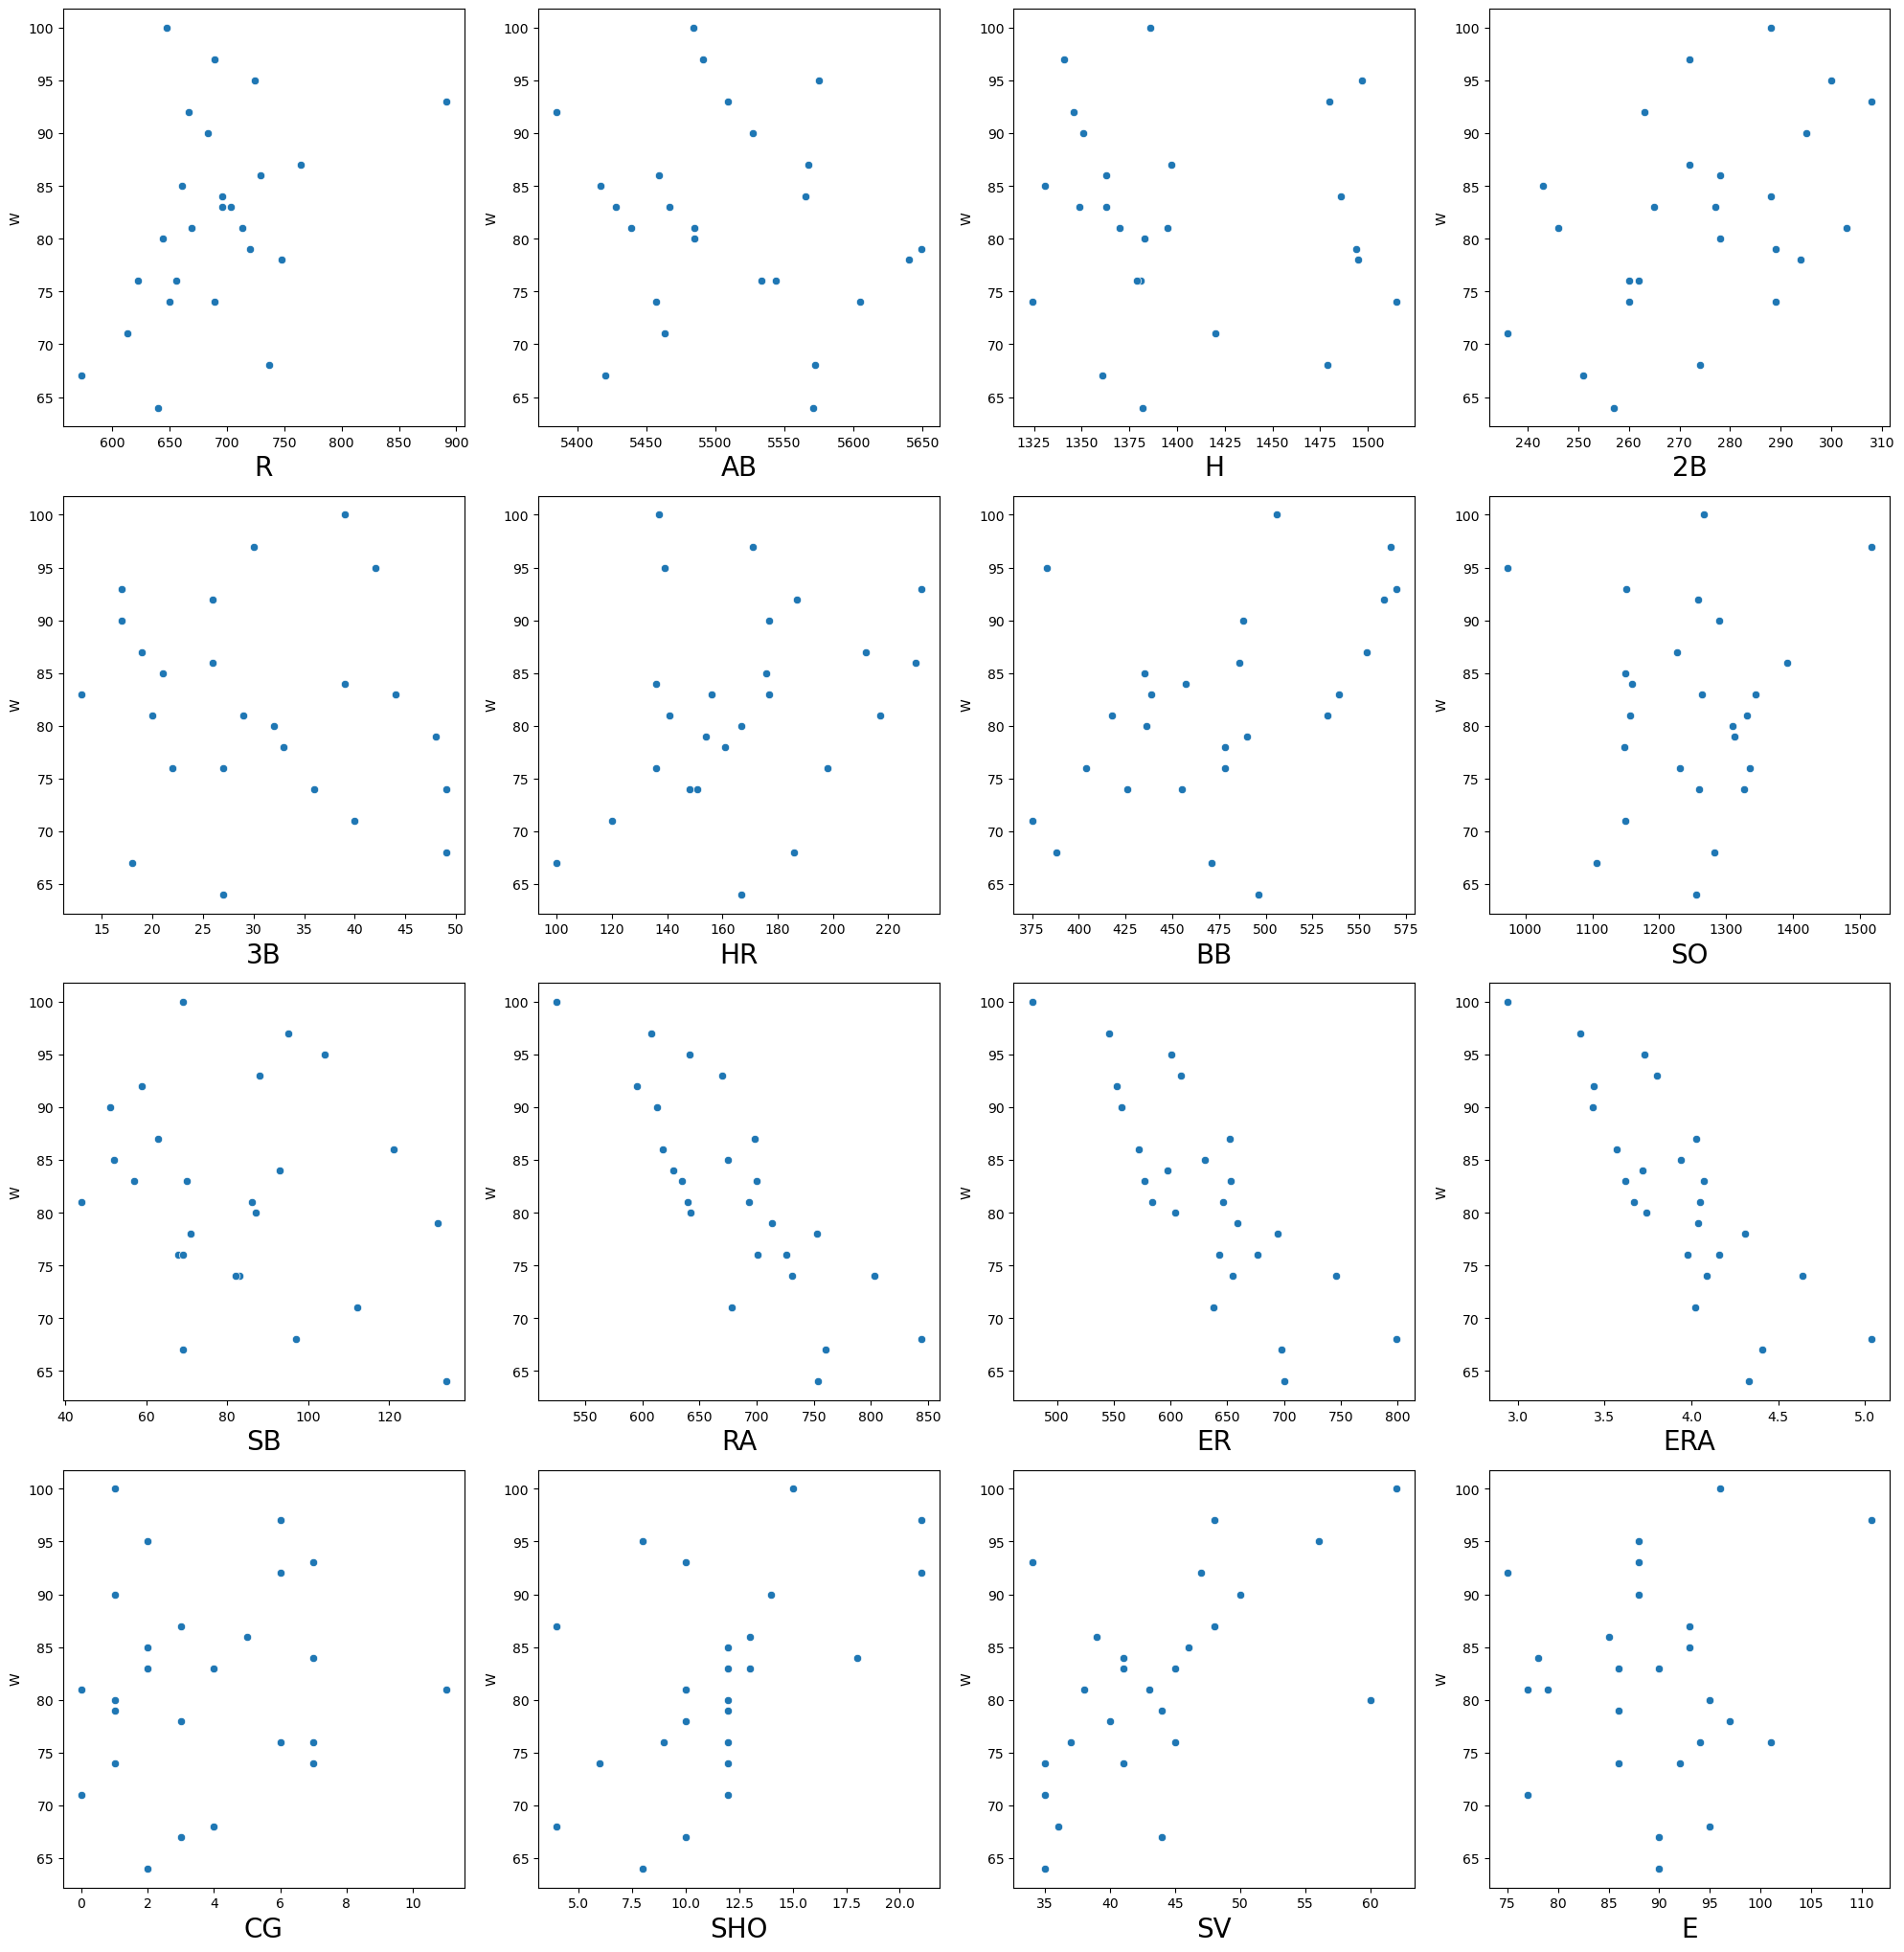

In [12]:
plt.figure(figsize=(20,25))
graph=1
for i in x.columns:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.scatterplot(x[i],y)
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [14]:
scaled_x=ss.fit_transform(x)

In [15]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [16]:
my_df=pd.DataFrame(scaled_x)

In [17]:
my_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.580480,0.941114,1.575831,1.363235,1.069913,-0.858638,-1.571891,-2.568052,0.903891,-0.586300,-0.440977,-0.453037,-0.607104,-0.846545,1.678744,-0.148522
1,0.116626,-0.610173,-0.897896,0.160996,1.256309,-0.338066,-0.598153,0.149809,-0.508439,0.263202,0.330584,0.336064,-0.607104,0.115438,0.189536,-0.396059
2,-0.330661,-1.012358,-0.129035,1.520049,-0.141661,-0.797394,1.036335,-0.849542,0.156187,-0.600699,-0.693218,-0.592290,2.645238,-0.365554,-0.758143,-1.262438
3,-1.109273,0.337836,-0.363036,-0.727616,-0.328057,-0.950504,-1.206739,-0.158402,-0.591517,0.277600,0.182207,0.127185,1.199753,-0.606049,-0.893525,1.460468
4,0.000663,1.372027,1.876689,0.788251,1.722299,-0.491175,-0.319942,0.103111,0.031570,1.746231,1.710491,1.658969,1.199753,0.115438,-1.164290,-0.396059


In [18]:
from sklearn.model_selection import train_test_split


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=53)

In [45]:
y_test

1     83
21    83
2     81
0     95
19    64
8     80
17    97
Name: W, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [21]:
lre.fit(x_train,y_train)

LinearRegression()

In [22]:
lre.score(x_train,y_train)

0.991290322892932

In [23]:
lre.score(x_test,y_test)

0.27453339332040594

In [24]:
from sklearn.metrics import r2_score

In [25]:
y_pred=lre.predict(x_test)

In [26]:
r2_score(y_test,y_pred)

0.27453339332040594

In [27]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [28]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)


LassoCV(cv=10, normalize=True)

In [29]:
alpha=lassocv.alpha_
alpha

0.038460793073120794

In [30]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.038460793073120794)

In [31]:
lasso_reg.score(x_test,y_test)

0.7681515695063051

In [32]:
lasso_reg.score(x_train,y_train)

0.9878741222250852

In [33]:
lassy_test=lasso_reg.predict(x_test)

In [34]:
r2_score(y_test,lassy_test)

0.7681515695063051

In [35]:
lassy_test

array([82.28508628, 84.14868997, 85.67551186, 90.43017597, 67.1015938 ,
       84.73384773, 87.57642302])

In [51]:
y_test

1     83
21    83
2     81
0     95
19    64
8     80
17    97
Name: W, dtype: int64